In [2]:
import pandas as pd
import requests
from io import StringIO

url = 'https://lazyprogrammer.me/course_files/all_stocks_5yr.csv'
response = requests.get(url)

if response.status_code == 200:
    df = pd.read_csv(StringIO(response.text))
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")



In [3]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [6]:
df['Name'].unique().shape

(505,)

In [7]:
ibm=df[df['Name']=='IBM']
ibm['close']

290491    201.68
290492    200.16
290493    200.04
290494    200.09
290495    199.65
           ...  
291745    162.40
291746    159.03
291747    152.53
291748    155.34
291749    153.85
Name: close, Length: 1259, dtype: float64

<Axes: >

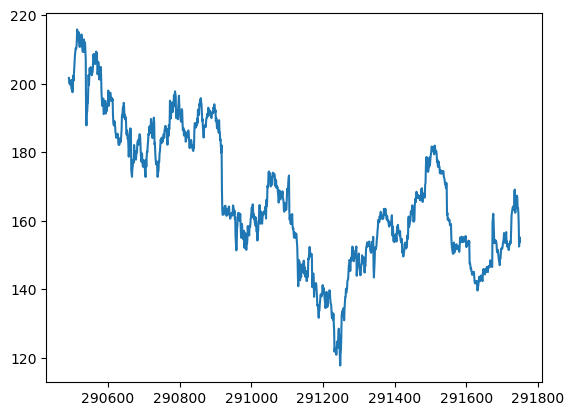

In [8]:
ibm['close'].plot()

In [9]:
df['date'].min(),df['date'].max()

('2013-02-08', '2018-02-07')

In [10]:
dates=pd.date_range(df['date'].min(),df['date'].max())
dates


DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [11]:
close_prices=pd.DataFrame(index=dates)
close_prices.head()

""
2013-02-08
2013-02-09
2013-02-10
2013-02-11
2013-02-12


In [12]:
symbols=df['Name'].unique()

In [82]:
df2=pd.DataFrame(data=ibm['close'].to_numpy(),index=ibm['date'],columns=['IBM'])
df2.head()

,IBM
date,
2013-02-08,201.68
2013-02-11,200.16
2013-02-12,200.04
2013-02-13,200.09
2013-02-14,199.65


In [83]:
#bunu anlamadin buna bir daha bak
for symbol in symbols:
    df_sym=df[df['Name']==symbol]
    df_tmp= pd.DataFrame(data=df_sym['close'].to_numpy(), index=df_sym['date'],columns=[symbol])
    close_prices=close_prices.join(df_tmp)
#=============================?Back this cell

In [84]:
close_prices.head()

,AAL_left,AAPL_left,AAP_left,ABBV_left,ABC_left,ABT_left,ACN_left,ADBE_left,ADI_left,ADM_left,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
2013-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,37.80,28.42,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
2013-02-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.44,28.22,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [53]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3085 entries, 2013-02-08 00:00:00 to 2018-02-07
Columns: 1515 entries, AAL_left to ZTS
dtypes: float64(1515)
memory usage: 35.7+ MB


In [29]:
close_prices.to_csv('/Users/efecelik/Desktop/sp500_close.csv')

In [33]:
!head /Users/efecelik/Desktop/sp500_close.csv

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,ADS,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALLE,ALL,ALXN,AMAT,AMD,AME,AMGN,AMG,AMP,AMT,AMZN,ANDV,ANSS,ANTM,AON,AOS,APA,APC,APD,APH,APTV,ARE,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,AZO,A,BAC,BAX,BA,BBT,BBY,BDX,BEN,BF.B,BHF,BHGE,BIIB,BK,BLK,BLL,BMY,BRK.B,BSX,BWA,BXP,CAG,CAH,CAT,CA,CBG,CBOE,CBS,CB,CCI,CCL,CDNS,CELG,CERN,CFG,CF,CHD,CHK,CHRW,CHTR,CINF,CI,CLX,CL,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COL,COO,COP,COST,COTY,CPB,CRM,CSCO,CSRA,CSX,CTAS,CTL,CTSH,CTXS,CVS,CVX,CXO,C,DAL,DE,DFS,DGX,DG,DHI,DHR,DISCA,DISCK,DISH,DIS,DLR,DLTR,DOV,DPS,DRE,DRI,DTE,DUK,DVA,DVN,DWDP,DXC,D,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,EQT,ESRX,ESS,ES,ETFC,ETN,ETR,EVHC,EW,EXC,EXPD,EXPE,EXR,FAST,FBHS,FB,FCX,FDX,FE,FFIV,FISV,FIS,FITB,FLIR,FLR,FLS,FL,FMC,FOXA,FOX,FRT,FTI,FTV,F,GD,GE,GGP,GILD,GIS,GLW,GM,GOOGL,GOOG,GPC,GPN,GPS,GRMN,GS,GT,GWW,HAL,HAS,HBAN,HBI,HCA,HCN,HCP,HD,HES,HIG,HII,HLT,HOG,HOLX,HON,HPE,HPQ,HP,HRB,HRL,HRS,HSIC,HST,HSY,HUM,IBM

In [63]:
close2= pd.read_csv('/Users/efecelik/Desktop/sp500_close.csv',index_col=0,parse_dates=True)
close2

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05,49.76,156.4900,109.86,109.51,91.90,58.73,151.83,190.27,85.40,40.60,...,66.97,37.68,79.72,58.54,31.38,72.66,79.80,123.18,51.65,73.83
2018-02-06,51.18,163.0300,112.20,111.20,91.54,58.86,154.69,194.47,88.54,42.00,...,68.99,37.34,78.35,58.46,30.85,71.33,80.58,122.30,52.52,73.27


In [37]:
close2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-02-08 to 2018-02-07
Columns: 505 entries, AAL to ZTS
dtypes: float64(505)
memory usage: 7.0 MB


<Axes: >

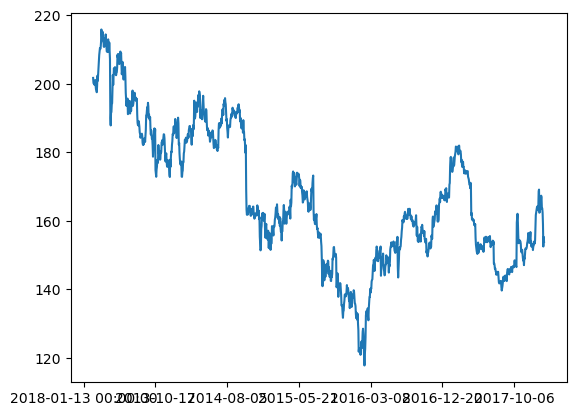

In [64]:
close_prices['IBM'].plot()

<Axes: >

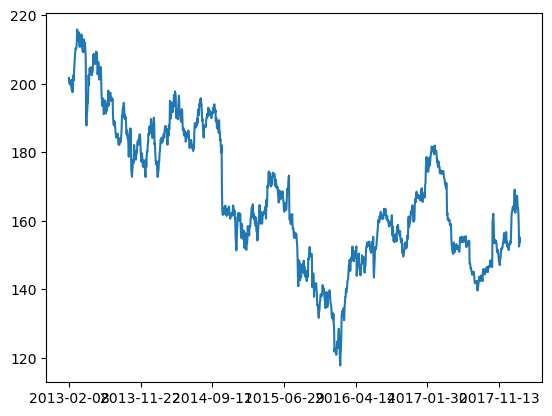

In [65]:
close_prices.dropna(axis=0,how='all',inplace=True)
close_prices['IBM'].plot()


In [86]:
close_prices.isna().sum()

AAL_left     0
AAPL_left    0
AAP_left     0
ABBV_left    0
ABC_left     0
            ..
XYL          0
YUM          0
ZBH          0
ZION         0
ZTS          0
Length: 5050, dtype: int64

In [87]:
close_prices.isna().sum().sum()


0

In [88]:
close_prices.iloc[0,:].isna().sum()

0

In [89]:
close_prices.fillna(method='ffill',inplace=True)


/var/folders/04/x8b7w93j611cywpjz8qm6x280000gn/T/ipykernel_1907/199777774.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_prices.fillna(method='ffill',inplace=True)


In [90]:
close_prices.isna().sum().sum()

0

In [91]:
close_prices.fillna(method='bfill',inplace=True)
close_prices.isna().sum().sum()


/var/folders/04/x8b7w93j611cywpjz8qm6x280000gn/T/ipykernel_1907/3380340979.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_prices.fillna(method='bfill',inplace=True)


0

<Axes: >

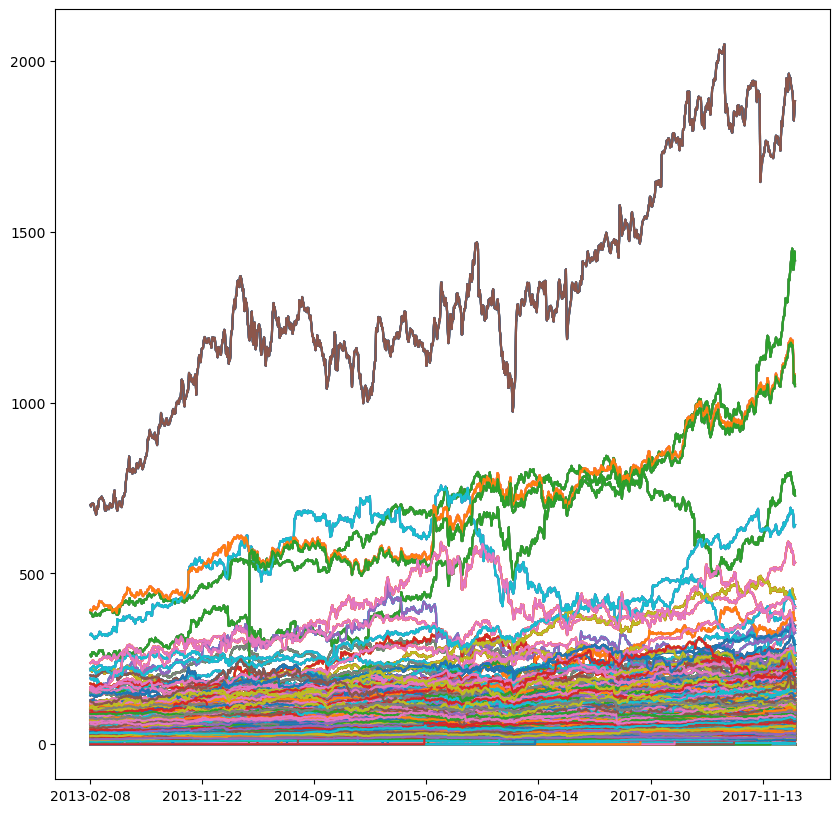

In [94]:
close_prices.plot(legend=False,figsize=(10,10))

<Axes: >

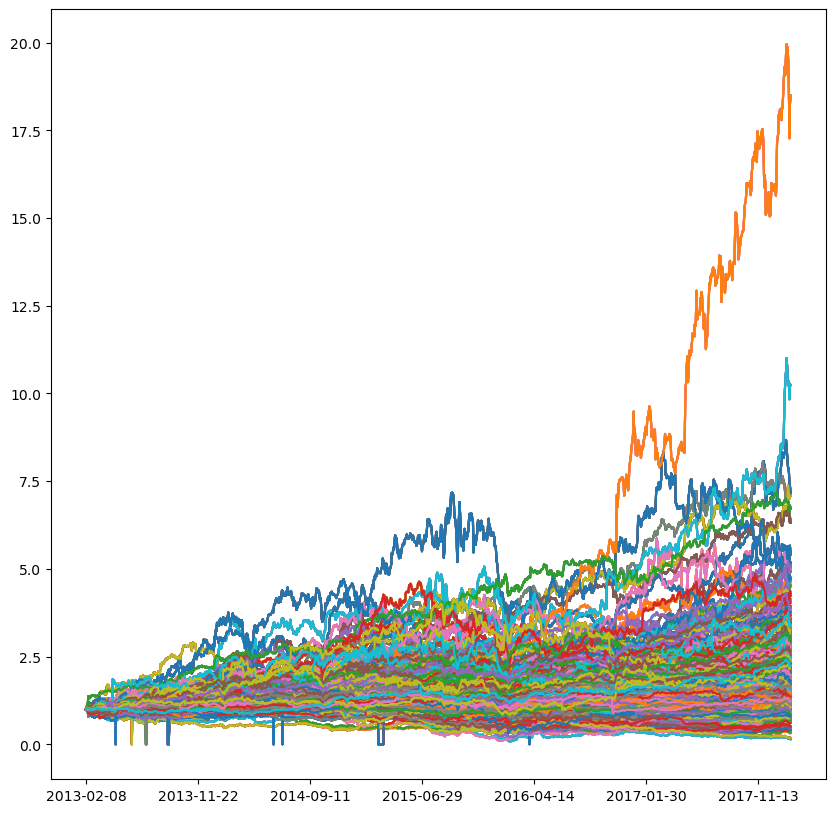

In [96]:
close_prices_normalized=close_prices/close_prices.iloc[0]
close_prices_normalized.plot(legend=False,figsize=(10,10))